<h1 style="color:blue"> Drug Classification Machine Learning </h1>

In [1]:
# libraries imported
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# reading csv
drugs = pd.read_csv('./drug200.csv')
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


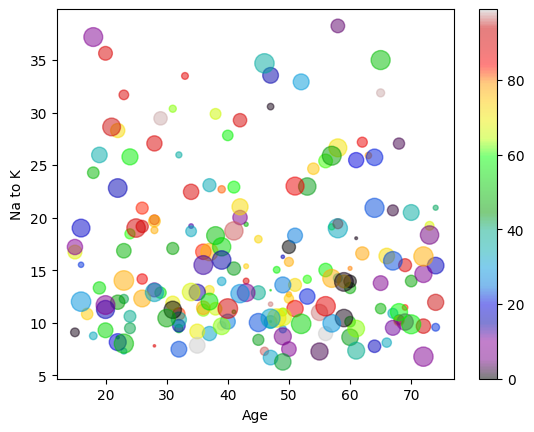

In [3]:
# Data Visualization with Scatter for Age and Na to K

colors = np.random.randint(100, size=(200))
plt.scatter(drugs['Age'], drugs['Na_to_K'], s = np.array([i for i in range(200)]), alpha = 0.5, c = colors, cmap='nipy_spectral')
plt.xlabel("Age")
plt.ylabel("Na to K")

plt.colorbar()
plt.show()

In [4]:
drugs.isna().sum() # no nan values

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
# Preprocessing

X = drugs.drop('Drug', axis = 1)
y = drugs['Drug']
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [8]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [9]:
# Encode the categorical features

ordinal = OrdinalEncoder()
X_encoded = ordinal.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.3, random_state = 101)

# Decision Tree Classifier training the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy for this model: {accuracy:.2}")

Accuracy for this model: 0.98


In [10]:
# Classification Report

report = classification_report(y_pred, y_test)
print(report)

              precision    recall  f1-score   support

       DrugY       1.00      0.96      0.98        27
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         9
       drugX       0.92      1.00      0.96        12

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [11]:
# Confusion Matrix

matrix = confusion_matrix(y_pred, y_test)
print(matrix)

[[26  0  0  0  1]
 [ 0  6  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 12]]
